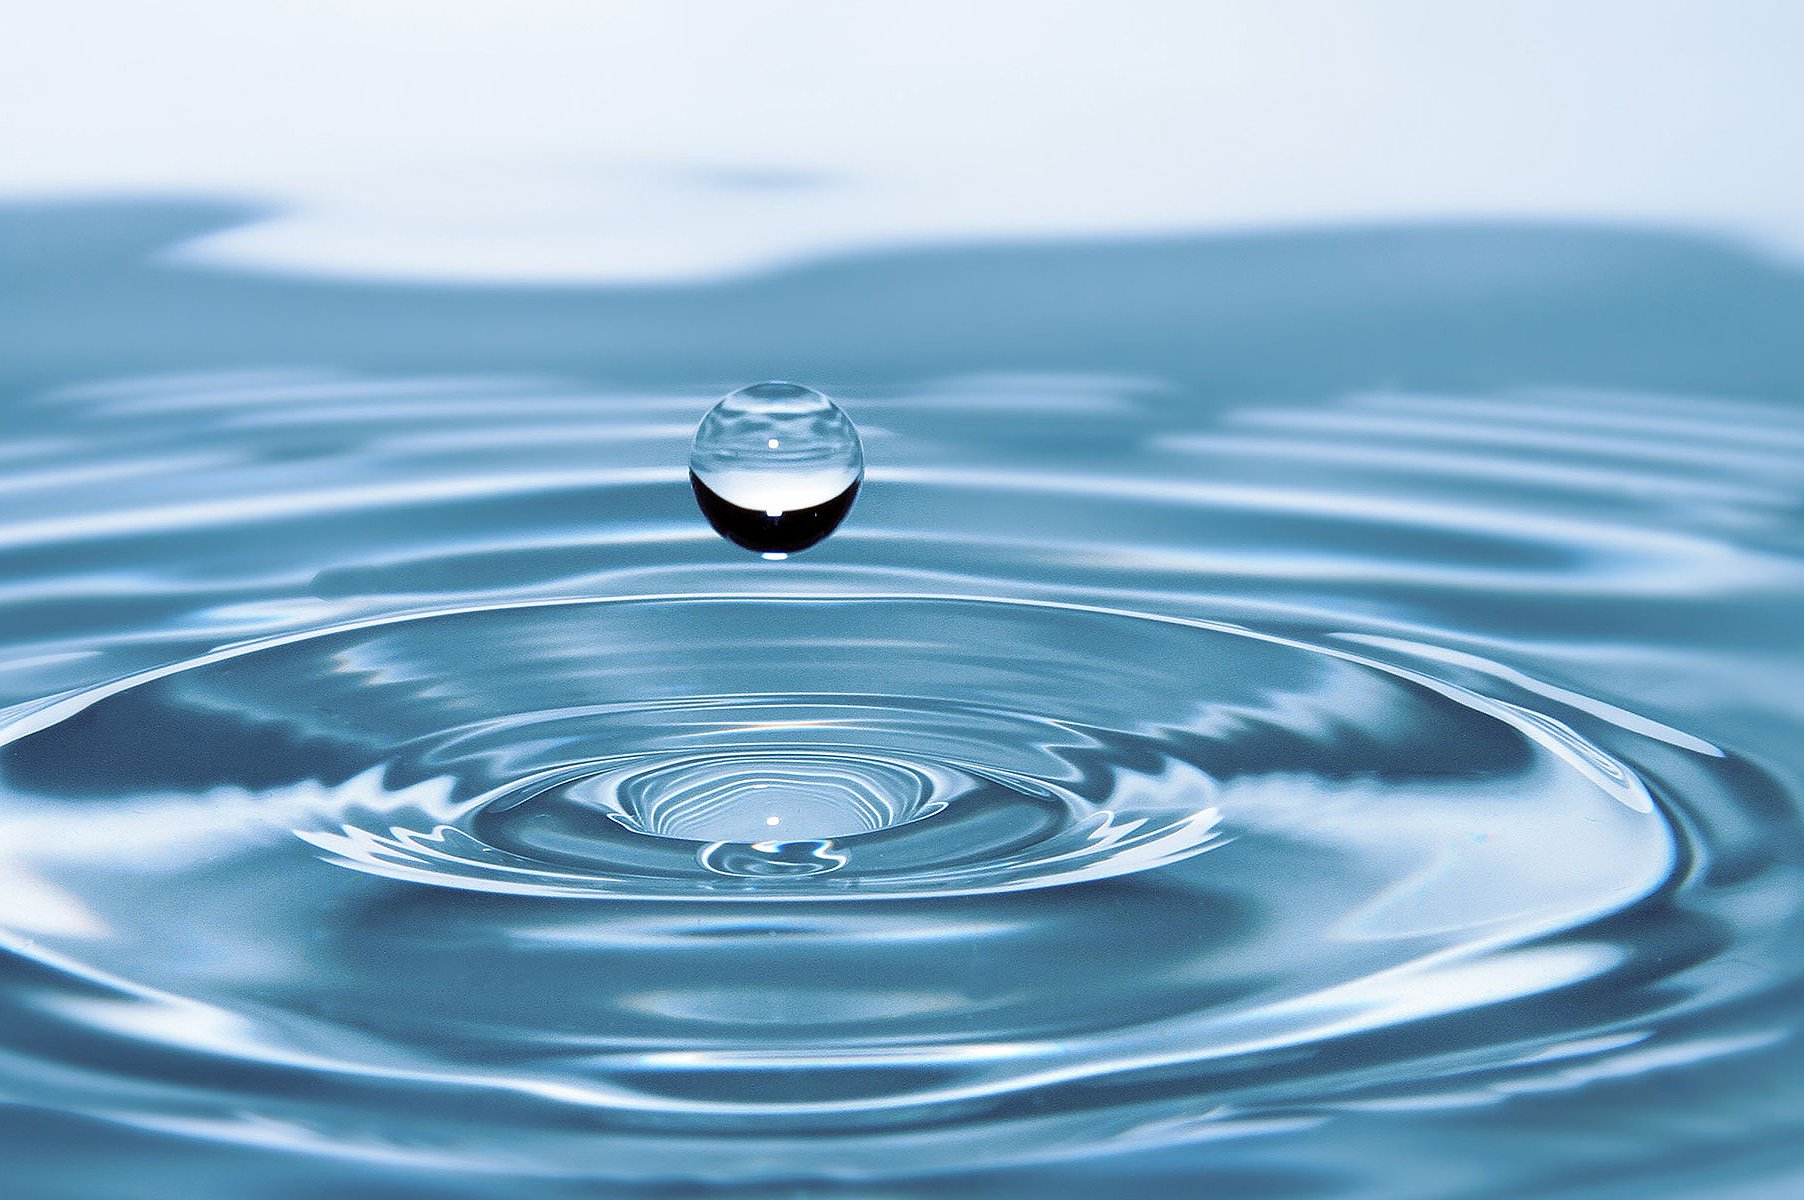

## Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

## Fetching Data

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Divits0/Water-Potability-Prediction/main/water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Statistics

In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Check Imbalance with respect to target in data

In [7]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Check for missing values

In [8]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
data.shape

(3276, 10)

## Feature Engineering using correlation matrix

<Axes: >

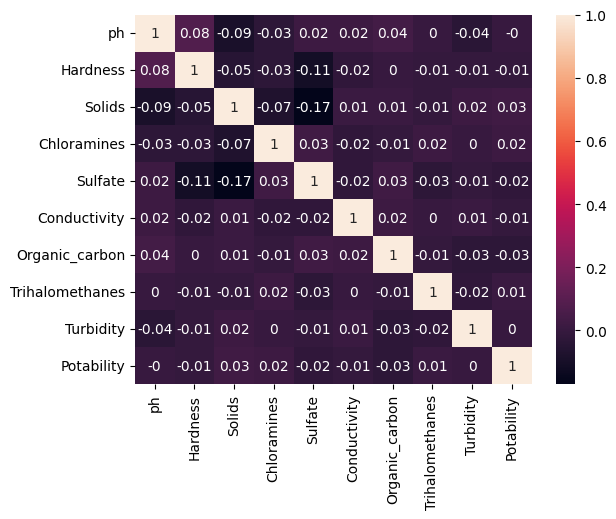

In [10]:
sns.heatmap(round(data.corr(),2),annot=True)

## Data Analysis

In [11]:
fig = make_subplots(rows=5, cols=2, subplot_titles=('ph',  'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                                    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                                                    'Turbidity'),vertical_spacing=0.05)

fig.add_trace(
    go.Histogram(x=data['ph'],
    name='ph'
),row=1, col=1)

fig.add_trace(
    go.Histogram(x=data['Hardness'],
    name='Hardness'
),row=1, col=2)

fig.add_trace(
    go.Histogram(x=data['Solids'],
    name='Solids'
),row=2, col=1)

fig.add_trace(
    go.Histogram(x=data['Chloramines'],
    name='Chloramines'
),row=2, col=2)

fig.add_trace(
    go.Histogram(x=data['Sulfate'],
    name='Sulfate'
),row=3, col=1)

fig.add_trace(
    go.Histogram(x=data['Conductivity'],
    name='Conductivity'
),row=3, col=2)

fig.add_trace(
    go.Histogram(x=data['Organic_carbon'],
    name='Organic_carbon'
),row=4, col=1)

fig.add_trace(
    go.Histogram(x=data['Trihalomethanes'],
    name='Trihalomethanes'
),row=4, col=2)

fig.add_trace(
    go.Histogram(x=data['Turbidity'],
    name='Turbidity'
),row=5, col=1)



fig.update_layout(height=1800, width=800, title_text="Histogram")
fig.show()

In [12]:
fig = make_subplots(rows=5, cols=2, subplot_titles=('ph',  'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                                                    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                                                    'Turbidity'),vertical_spacing=0.05)

fig.add_trace(
    go.Box(
      y=data['ph'],
      x=data['Potability'],
      name='ph',
      marker_color='green'
),row=1, col=1)

fig.add_trace(
    go.Box(
      y=data['Hardness'],
      x=data['Potability'],
      name='Hardness',
      marker_color='brown'
),row=1, col=2)

fig.add_trace(
    go.Box(
      y=data['Solids'],
      x=data['Potability'],
      name='Solids',
      marker_color='red'
),row=2, col=1)

fig.add_trace(
    go.Box(
      y=data['Chloramines'],
      x=data['Potability'],
      name='Chloramines',
      marker_color='blue'
),row=2, col=2)

fig.add_trace(
    go.Box(
      y=data['Sulfate'],
      x=data['Potability'],
      name='Sulfate',
      marker_color='darkgray'
),row=3, col=1)

fig.add_trace(
    go.Box(
      y=data['Conductivity'],
      x=data['Potability'],
      name='Conductivity',
      marker_color='orange'
),row=3, col=2)

fig.add_trace(
    go.Box(
      y=data['Organic_carbon'],
      x=data['Potability'],
      name='Organic_carbon',
      marker_color='violet'
),row=4, col=1)

fig.add_trace(
    go.Box(
      y=data['Trihalomethanes'],
      x=data['Potability'],
      name='Trihalomethanes',
      marker_color='indigo'
),row=4, col=2)

fig.add_trace(
    go.Box(
      y=data['Turbidity'],
      x=data['Potability'],
      name='Turbidity',
      marker_color='darkcyan'
),row=5, col=1)



fig.update_layout(height=2400, width=800, title_text="Box Plots")
fig.show()

## Treating Outliers using z-score

In [13]:
# used z-score instead of inter quartile range as recall score dropped and setting it to np.nan as dataset is small
from scipy import stats

z_scores = stats.zscore(data)
z_scores
((z_scores < -2.5) | (z_scores > 2.5))
new_data = data.mask((z_scores < -2.5) | (z_scores > 2.5), np.nan)
new_data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Using Imputation to handle missing data

In [14]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(new_data)
imputed_data = pd.DataFrame(imp_mean.transform(new_data),columns=data.columns)

In [15]:
imputed_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Using sampling Technique to treat data properly

In [16]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class

df_majority = imputed_data[imputed_data['Potability']==0]
df_minority = imputed_data[imputed_data['Potability']==1]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1998, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

## Splitting data into traing and testing set

In [17]:
upx = df_upsampled.iloc[:, :-1].values
upy = df_upsampled.iloc[:,-1].values
from sklearn.model_selection import train_test_split
upx_train, upx_test, upy_train, upy_test = train_test_split(upx, upy, train_size=0.8, random_state = 42)

## Data Modeling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

models = [LogisticRegression(random_state=42),GaussianNB(),svm.SVC(random_state=42),KNeighborsClassifier(),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42)
          ,XGBClassifier(random_state=42)]

models_names = ['LogisticRegression','GaussianNB','SVC'\
                ,'KNeighborsClassifier','RandomForestClassifier',\
                'GradientBoostingClassifier','XGBClassifier']

z=0
Recall=[]
Specificity=[]
Accuracy=[]
Precision=[]
F1_Score=[]
for model in models:
    print(model)
    model.fit(upx_train,upy_train)
    pickle.dump(model , open(str(models_names[z])[:-2]+'.pk1' , 'wb'))
    upy_pred=model.predict(upx_test)
    print(classification_report(upy_test,upy_pred))
    cm_test = confusion_matrix(upy_test, upy_pred)
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(upy_test, upy_pred), 4))
    Recall.append(round(recall_score(upy_test, upy_pred), 4))
    print("Specificity on Test Data: ", round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4))
    Specificity.append(round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4))
    print("Accuracy on Test Data: ", round(accuracy_score(upy_test, upy_pred), 4))
    Accuracy.append(round(accuracy_score(upy_test, upy_pred), 4))
    print("Precision on Test Data: ", round(precision_score(upy_test, upy_pred), 4))
    Precision.append(round(precision_score(upy_test, upy_pred), 4))
    print("F1 Score Test Data: ", round(f1_score(upy_test, upy_pred), 4))
    F1_Score.append(round(f1_score(upy_test, upy_pred), 4))
    print("--------------------------------------------------------------------------")
    z=z+1

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

         0.0       0.48      0.56      0.52       385
         1.0       0.52      0.44      0.48       415

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

--------------------------------------------------------------------------
Recall on Test Data:  0.4434
Specificity on Test Data:  0.5558
Accuracy on Test Data:  0.4975
Precision on Test Data:  0.5183
F1 Score Test Data:  0.4779
--------------------------------------------------------------------------
GaussianNB()
              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60       385
         1.0       0.60      0.42      0.49       415

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.55       800
weighted avg       0.57      0.56      0.55     

## Use of Grid Search CV

In [19]:
from sklearn.model_selection import GridSearchCV
grid2 = {'n_estimators': [100,150,200,250,300,170], 'criterion': ['log_loss']}

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, grid2, cv = 5)
rf_cv.fit(upx_train, upy_train)

print("Best Parameters: ", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)

Best Parameters:  {'criterion': 'log_loss', 'n_estimators': 150}
Accuracy:  0.8038204225352112


## Using Hyper Parameters on best model

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,criterion='log_loss',random_state=42)
classifier.fit(upx_train, upy_train)
upy_pred = classifier.predict(upx_test)
print(classification_report(upy_test,upy_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       385
         1.0       0.84      0.80      0.82       415

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

